# import dependencies

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [48]:
# loading the data to pandas dataframe
cars_dataset=pd.read_csv("car data.csv")
# print the first five rows
cars_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [49]:
# checking the number of rows and columns of the dataset
cars_dataset.shape

(301, 9)

In [50]:
# infomation about data
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [51]:
# checking the number of missing values in each columns
cars_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [52]:
# checking the destribution of categorical data
print(cars_dataset.Fuel_Type.value_counts())
print(cars_dataset.Seller_Type.value_counts())
print(cars_dataset.Transmission.value_counts())
print(cars_dataset.Car_Name.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


# Encoding the Categorical Data

In [53]:
# encording the fuel type column
cars_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encording the seller type column
cars_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encording the Transmission column
cars_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

cars_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Split data and target data

In [54]:
x=cars_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=cars_dataset['Selling_Price']
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

# Split into training and testing data

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

# Model Training

In [56]:
# loading the linear regression model
lin_reg_model=LinearRegression()

In [57]:
# fit the data
lin_reg_model.fit(x_train,y_train)
LinearRegression(fit_intercept=True,n_jobs=None)

LinearRegression()

# model evaluation

In [58]:
# prediction on training data
training_data_prediction=lin_reg_model.predict(x_train)

In [59]:
# R squred error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R squred error:",error_score)

R squred error: 0.87994516604937


# Visualize the actual value and predicted value

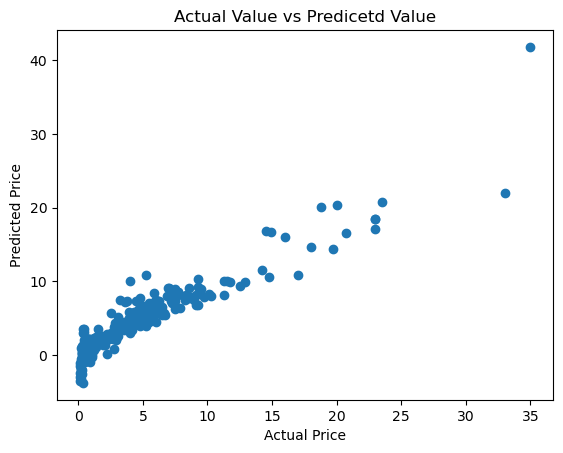

In [60]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Value vs Predicetd Value")
plt.show()

In [61]:
# prediction on test data
test_data_prediction=lin_reg_model.predict(x_test)

In [62]:
# R squred error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squred error:",error_score)

R squred error: 0.8365766715024749


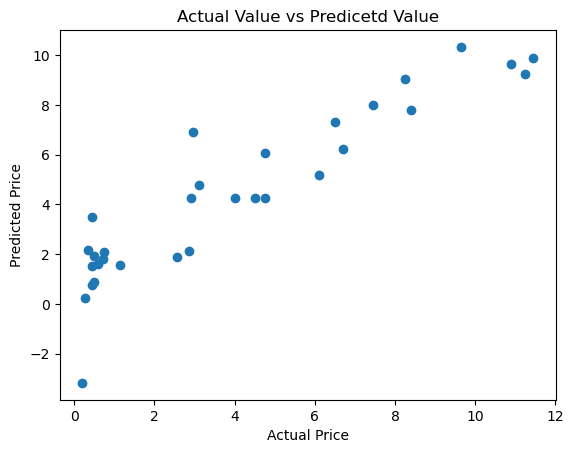

In [63]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Value vs Predicetd Value")
plt.show()

# Making the Predective system

In [64]:
input_data=(2014,5.59,27000,0,0,0,0)
# changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshape  the array as we are predicting to one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=lin_reg_model.predict(input_data_reshaped)
print("Predicted Price of this car is Rs.",prediction[0],"mn")



Predicted Price of this car is Rs. 3.8390135356478368 mn
